## 图象的仿射变换
在图像的数据变换前添加仿射变换(Affine2D)允许操作图像的形状和方向。这是转换链接概念的一个示例。
输出图像的边界应该与虚线黄色矩形匹配。

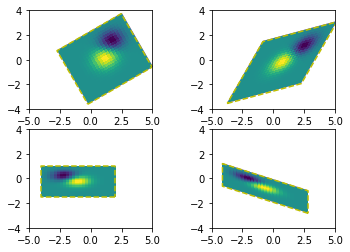

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms


def get_image():
    delta = 0.25
    x = y = np.arange(-3.0, 3.0, delta)
    X, Y = np.meshgrid(x, y)
    Z1 = np.exp(-X**2 - Y**2)
    Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
    Z = (Z1 - Z2)
    return Z


def do_plot(ax, Z, transform):
    im = ax.imshow(Z, interpolation='none',
                  origin='lower',
                  extent=[-2, 4, -3, 2], clip_on=True)
    
    trans_data = transform + ax.transData
    im.set_transform(trans_data)
    
    # display intended extent of the image  显示图像的预期范围
    x1, x2, y1, y2 = im.get_extent()
    ax.plot([x1, x2, x2, x1, x1], [y1, y1, y2, y2, y1], "y--",
           transform=trans_data)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-4, 4)
    
    
# prepare image and figure 准备图像和数字
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
Z = get_image()

# image rotation 图像旋转
do_plot(ax1, Z, mtransforms.Affine2D().rotate_deg(30))

# image skew 图像倾斜
do_plot(ax2, Z, mtransforms.Affine2D().skew_deg(30, 15))

# scale and reflection 规模和反射
do_plot(ax3, Z, mtransforms.Affine2D().scale(-1, .5))

# everything and a translation 所有东西和翻译
do_plot(ax4, Z, mtransforms.Affine2D().
       rotate_deg(30).skew_deg(30, 15).scale(-1, .5).translate(.5, -1))

plt.savefig("image24.png")
plt.show()

## 篡改为imshow
这个例子展示了imshow的不同插值方法。
如果插值是None，它默认为rcParams["image.插值"](默认为' antialiases ')。如果插值是'none'，那么Agg、ps和pdf后端不执行插值。其他后端默认为“抗锯齿”。
对于Agg, ps和pdf后端，插值= 'none'在大图像缩小时工作得很好，而插值= '最近的'在小图像缩小时工作得很好。
关于默认插值=“反锯齿”选项的讨论，请参阅图像反锯齿。

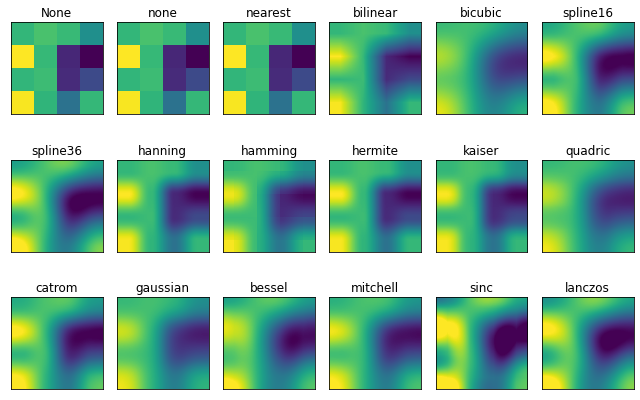

In [5]:
import matplotlib.pyplot as plt
import numpy as np

methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
          'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
          'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']

# Fixing random state for reproducibility
np.random.seed(19680801)

grid = np.random.rand(4, 4)

fig, axs = plt.subplots(nrows=3, ncols=6, figsize=(9, 6),
                       subplot_kw={'xticks': [], 'yticks': []})

for ax, interp_method in zip(axs.flat, methods):
    ax.imshow(grid, interpolation=interp_method, cmap='viridis')
    ax.set_title(str(interp_method))
    
    
plt.tight_layout()
plt.savefig("image25.png")
plt.show()

## BboxImage演示
BboxImage可用于根据边框对图像进行定位。这个演示演示了如何在文本中显示图像。文本的边框以及如何手动创建图像的边框。

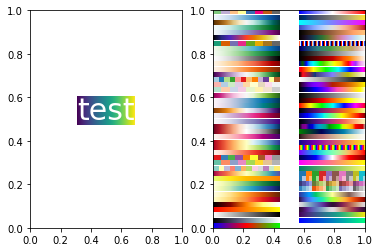

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.image import BboxImage
from matplotlib.transforms import Bbox, TransformedBbox


fig, (ax1, ax2) = plt.subplots(ncols=2)

# ----------------------------
# Create a BboxImage with Text
# ----------------------------
txt = ax1.text(0.5, 0.5, "test", size=30, ha="center", color="w")
kwargs = dict()

bbox_image = BboxImage(txt.get_window_extent,
                      norm=None,
                      origin=None,
                      clip_on=False,
                      **kwargs
                      )
a = np.arange(256).reshape(1, 256)/256.
bbox_image.set_data(a)
ax1.add_artist(bbox_image)

# -------------------------------------
# Create a BboxImage for each colormap
# -------------------------------------
a = np.linspace(0, 1, 256).reshape(1, -1)
a = np.vstack((a, a))

# List of all colormaps; akip reversed colormaps.
maps = sorted(m for m in plt.colormaps() if not m.endswith("_r"))

ncol = 2
nrow = len(maps)//ncol + 1

xpad_fraction = 0.3
dx = 1./(ncol + xpad_fraction*(ncol - 1))

ypad_fraction = 0.3
dy = 1./(nrow + ypad_fraction*(nrow - 1))

for i, m in enumerate(maps):
    ix, iy = divmod(i, nrow)
    
    bbox0 = Bbox.from_bounds(ix*dx*(1 + xpad_fraction),
                            1. - iy*dy*(1 + ypad_fraction) - dy,
                            dx, dy)
    bbox = TransformedBbox(bbox0, ax2.transAxes)
    
    bbox_image = BboxImage(bbox,
                          cmap=plt.get_cmap(m),
                          norm=None,
                          **kwargs
                          )
    
    bbox_image.set_data(a)
    ax2.add_artist(bbox_image)
    
plt.savefig("image26.png")
plt.show()

## 间谍演示
绘制数组的稀疏模式。

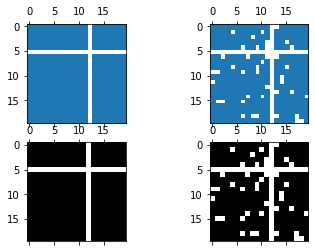

In [16]:
import matplotlib.pyplot as plt
import numpy as np


# Fixing random state for reproducibility
np.random.seed(19680801)

fig, axs = plt.subplots(2, 2)
ax1 = axs[0, 0]
ax2 = axs[0, 1]
ax3 = axs[1, 0]
ax4 = axs[1, 1]

x = np.random.randn(20, 20)
x[5, :] = 0.
x[:, 12] = 0.

ax1.spy(x, markersize=5)
ax2.spy(x, precision=0.1, markersize=5)

ax3.spy(x)
ax4.spy(x, precision=0.1)

plt.savefig("image26.png")
plt.show()

## 条形码演示
这个演示演示了如何生成一维图像，或“条形码”。

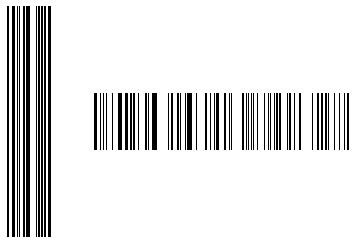

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility 为再现性固定随机状态
np.random.seed(19680801)

# the bar
x = np.random.rand(500) > 0.7

barprops = dict(aspect='auto', cmap='binary', interpolation='nearest')

fig = plt.figure()

# a vertical barcode 一个垂直的条形码
ax1 = fig.add_axes([0.1, 0.1, 0.1, 0.8])
ax1.set_axis_off()
ax1.imshow(x.reshape((1, -1)), **barprops)

# a horizontal barcode 一个水平的条形码
ax2 = fig.add_axes([0.3, 0.4, 0.6, 0.2])
ax2.set_axis_off()
ax2.imshow(x.reshape((1, -1)), **barprops)

plt.savefig("image27.png")
plt.show()

## 层图像
使用alpha混合的图层图像

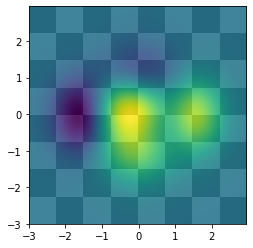

In [21]:
import matplotlib.pyplot as plt 
import numpy as np


def func3(x, y):
    return (1 -x / 2 + x**5 +y**3)* np.exp(-(x**2 + y**2))
# make these smaller to increase the resolution
dx, dy = 0.05, 0.05

x = np.arange(-3.0, 3.0, dx)
y = np.arange(-3.0, 3.0, dy)
X, Y = np.meshgrid(x, y)

# 当分层多个图像，图像需要有相同的
# 程度。这并不意味着它们必须有相同的形状，但是
# 它们都需要渲染到相同的坐标系统
# xmin, xmax, ymin, ymax。注意你是否使用了不同的插值
# 对于图像来说，它们的表面范围可能会不同，因为
# 插值边缘效果

extent = np.min(x), np.max(x), np.min(y), np.max(y)
fig = plt.figure(frameon=False)

Z1 = np.add.outer(range(8), range(8)) % 2  # chessboard 棋盘
im1 = plt.imshow(Z1, cmap=plt.cm.gray, interpolation='nearest',
                extent=extent)

Z2 = func3(X, Y)

im2 = plt.imshow(Z2, cmap=plt.cm.viridis, alpha=.9, interpolation='bilinear',
                extent=extent)

plt.savefig("image27.png")
plt.show()

## Triinterp演示
从三角形网格到四边形网格的插值。

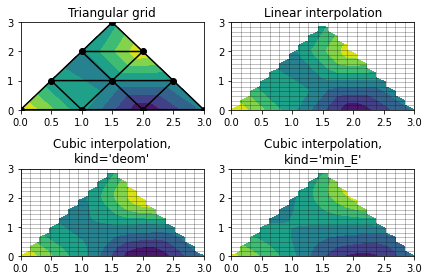

In [25]:
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
import numpy as np

# Create triangulation. 创建三角。
x = np.asarray([0, 1, 2, 3, 0.5, 1.5, 2.5, 1, 2, 1.5])
y = np.asarray([0, 0, 0, 0, 1.0, 1.0, 1.0, 2, 2, 3.0])
triangles = [[0, 1, 4], [1, 2, 5], [2, 3, 6], [1, 5, 4], [2, 6, 5], [4, 5, 7],
            [5, 6, 8], [5, 8, 7], [7, 8, 9]]
triang = mtri.Triangulation(x, y, triangles)

# Interpolate to regularly-spaced quad grid. 插值到规则的四边形网格
z = np.cos(1.5 * x) * np.cos(1.5 * y)
xi, yi = np.meshgrid(np.linspace(0, 3, 20), np.linspace(0, 3, 20))

interp_lin =mtri.LinearTriInterpolator(triang, z)
zi_lin = interp_lin(xi, yi)

interp_cubic_geom = mtri.CubicTriInterpolator(triang, z, kind='geom')
zi_cubic_geom = interp_cubic_geom(xi, yi)

interp_cubic_min_E = mtri.CubicTriInterpolator(triang, z, kind='min_E')
zi_cubic_min_E = interp_cubic_min_E(xi, yi)

# Set up the figure 设置图形
fig, axs = plt.subplots(nrows=2, ncols=2)
axs = axs.flatten()

# Plot the triangulation. 画出三角。
axs[0].tricontourf(triang, z)
axs[0].triplot(triang, 'ko-')
axs[0].set_title('Triangular grid')

# Plot linear interpolation to quad grid. 绘制线性插值到四边形网格。
axs[1].contourf(xi, yi, zi_lin)
axs[1].plot(xi, yi, 'k-', lw=0.5, alpha=0.5)
axs[1].plot(xi.T, yi.T, 'k-', lw=0.5, alpha=0.5)
axs[1].set_title("Linear interpolation")

# Plot cubic interpolation to quad grid, kind=geom 绘制三次插值到四边形网格，kind=geom
axs[2].contourf(xi, yi, zi_cubic_geom)
axs[2].plot(xi, yi, 'k-', lw=0.5, alpha=0.5)
axs[2].plot(xi.T, yi.T, 'k-', lw=0.5, alpha=0.5)
axs[2].set_title("Cubic interpolation,\nkind='deom'")

# Plot cubic interpolation to quad grid, kind=min_E 绘制三次插值到四边形网格
axs[3].contourf(xi, yi, zi_cubic_min_E)
axs[3].plot(xi, yi, 'k-', lw=0.5, alpha=0.5)
axs[3].plot(xi.T, yi.T, 'k-', lw=0.5, alpha=0.5)
axs[3].set_title("Cubic interpolation,\nkind='min_E'")

fig.tight_layout()
plt.savefig("image30.png")
plt.show()

## Trigradient演示
演示了用matplotlib.tri.CubicTriInterpolator计算梯度。

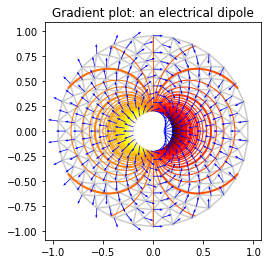

In [29]:
from matplotlib.tri import(
    Triangulation, UniformTriRefiner, CubicTriInterpolator)
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

#-----------------------------------------------------------------------------
# Electrical potential of a dipole 偶极子电势
#-----------------------------------------------------------------------------
def dipole_potential(x, y):
    """The electric dipole potential V, at position *x*, *y*."""
    r_sq = x**2 + y**2
    theta = np.arctan2(y, x)
    z = np.cos(theta)/r_sq
    return (np.max(z) - z) / (np.max(z) - np.min(z))


#-----------------------------------------------------------------------------
# Creating a Triangulation 创建一个三角
#-----------------------------------------------------------------------------
# First create the x and y coordinates of the points. 首先创建点的x和y坐标。
n_angles = 30
n_radii = 10
min_radius = 0.2
radii = np.linspace(min_radius, 0.95, n_radii)

angles = np.linspace(0, 2 * np.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += np.pi / n_angles

x = (radii*np.cos(angles)).flatten()
y = (radii*np.sin(angles)).flatten()
V = dipole_potential(x, y)

#创建三角测量;没有指定三角形，所以德劳内三角法
#创建。
triang = Triangulation(x, y)

#屏蔽掉不想要的三角形。
triang.set_mask(np.hypot(x[triang.triangles].mean(axis=1),
                         y[triang.triangles].mean(axis=1))
               < min_radius)

#-----------------------------------------------------------------------------
#细化数据-插入电势V
#-----------------------------------------------------------------------------
refiner = UniformTriRefiner(triang)
tri_refi, z_test_refi = refiner.refine_field(V, subdiv=3)

#-----------------------------------------------------------------------------
#以电势梯度计算电场(Ex, Ey)
#-----------------------------------------------------------------------------
tci = CubicTriInterpolator(triang, -V)
#渐变请求在这里的网格节点，但可以在其他任何地方:
(Ex, Ey) = tci.gradient(triang.x, triang.y)
E_norm = np.sqrt(Ex**2 + Ey**2)

#-----------------------------------------------------------------------------
#绘制三角剖分、位势等高线和矢量场
#-----------------------------------------------------------------------------
fig, ax = plt.subplots()
ax.set_aspect('equal')
#加强边距，并扩大它们，为向量留出空间。
ax.use_sticky_edges = False
ax.margins(0.07)

ax.triplot(triang, color='0.8')

levels = np.arange(0., 1., 0.01)
cmap = cm.get_cmap(name='hot', lut=None)
ax.tricontour(tri_refi, z_test_refi, levels=levels, cmap=cmap,
             linewidths=[2.0, 1.0, 1.0, 1.0])
#绘制电矢量场的方向
ax.quiver(triang.x, triang.y, Ex/E_norm, Ey/E_norm,
         units='xy', scale=10., zorder=3, color='blue',
         width=0.007, headwidth=3., headlength=4.)

ax.set_title('Gradient plot: an electrical dipole')
plt.savefig("image40.png")
plt.show()